In [ ]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from src.utils.path_manager import get_path_manager
import matplotlib.pyplot as plt


In [ ]:
def load_pkl(file_path):
    """
    加载pkl文件
    参数:file_path (str): pkl文件的路径
    返回:object: 加载的对象
    """
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f, encoding='bytes')
            return data
    except FileNotFoundError:
        print(f"无法找到文件{file_path}")
        return None
    except Exception as e:
        print(e)
        return None

In [1]:
# 指定pkl文件路径
paths = get_path_manager()
data_root = paths.WESAD_ROOT
file_path = data_root / "S2" / "S2.pkl"
print(file_path)


D:\Apps\Development\Projects\MultimodalSignal\WESAD\S2\S2.pkl


In [10]:
# 加载数据
data = load_pkl(file_path)

print(f"数据类型:{type(data)}")

print("字典键:")

for key , vaul in data.items():
    vaul_type = type(vaul)
    size_info = " "
    if hasattr(vaul, "__len__"):
        size_info = f" (长度{len(vaul)})"
    elif hasattr(vaul, "shape"):
        size_info = f" (形状{vaul.shape})"
    print(f"{key}: {vaul_type}{size_info}")

    if isinstance(vaul, np.ndarray):
        print(f"  数组信息 ({key}): 形状={vaul.shape}, 类型={vaul.dtype}, "
                      f"最小值={vaul.min()}, 最大值={vaul.max()}, "
                      f"均值={vaul.mean():.4f}, 标准差={vaul.std():.4f}")

for sub_key, sub_data in data[b'signal'].items():
    print(f"{sub_key}: {type(sub_data)}, 长度={len(sub_data)}")

wrist_data = data[b'signal'][b'wrist']
print("wrist 子键:", wrist_data.keys())
for sub_key, sub_array in wrist_data.items():
    if isinstance(sub_array, np.ndarray):
        print(f"{sub_key}: {type(sub_array)}, 形状={sub_array.shape}, 类型={sub_array.dtype}")


数据类型:<class 'dict'>
字典键:
b'signal': <class 'dict'> (长度2)
b'label': <class 'numpy.ndarray'> (长度4255300)
  数组信息 (b'label'): 形状=(4255300,), 类型=int32, 最小值=0, 最大值=7, 均值=1.2124, 标准差=1.6066
b'subject': <class 'bytes'> (长度2)
b'chest': <class 'dict'>, 长度=6
b'wrist': <class 'dict'>, 长度=4
wrist 子键: dict_keys([b'ACC', b'BVP', b'EDA', b'TEMP'])
b'ACC': <class 'numpy.ndarray'>, 形状=(194528, 3), 类型=float64
b'BVP': <class 'numpy.ndarray'>, 形状=(389056, 1), 类型=float64
b'EDA': <class 'numpy.ndarray'>, 形状=(24316, 1), 类型=float64
b'TEMP': <class 'numpy.ndarray'>, 形状=(24316, 1), 类型=float64


In [22]:
chest_signals = data[b'signal'][b'chest']
print(pkl_data[b'signal'][b'chest'].keys())

for signal_name, signal_data in chest_signals.items():
    if isinstance(signal_data, np.ndarray):
        print(f"\n信号: {signal_name}")
        print(f"形状: {signal_data.shape}")
        print(f"类型: {signal_data.dtype}")
        print(f"最小值: {signal_data.min()}")
        print(f"最大值: {signal_data.max()}")
        print(f"均值: {signal_data.mean():.4f}")
        print(f"标准差: {signal_data.std():.4f}")


dict_keys([b'ACC', b'ECG', b'EMG', b'EDA', b'Temp', b'Resp'])

信号: b'ACC'
形状: (4255300, 3)
类型: float64
最小值: -1.1354000568389893
最大值: 2.0297999382019043
均值: 0.0660
标准差: 0.5405

信号: b'ECG'
形状: (4255300, 1)
类型: float64
最小值: -1.499542236328125
最大值: 1.4993133544921875
均值: 0.0012
标准差: 0.1541

信号: b'EMG'
形状: (4255300, 1)
类型: float64
最小值: -0.4149627685546875
最大值: 0.3009796142578125
均值: -0.0024
标准差: 0.0117

信号: b'EDA'
形状: (4255300, 1)
类型: float64
最小值: 0.263214111328125
最大值: 7.576751708984375
均值: 1.5284
标准差: 1.2384

信号: b'Temp'
形状: (4255300, 1)
类型: float32
最小值: 28.045257568359375
最大值: 34.370391845703125
均值: 30.8767
标准差: 1.2811

信号: b'Resp'
形状: (4255300, 1)
类型: float64
最小值: -27.90374755859375
最大值: 27.37884521484375
均值: 0.0549
标准差: 2.9177


In [9]:
wrist_signals = data[b'signal'][b'wrist']
for signal_name, signal_data in wrist_signals.items():
    if isinstance(signal_data, np.ndarray):
        print(f"\n信号: {signal_name}")
        print(f"形状: {signal_data.shape}")
        print(f"类型: {signal_data.dtype}")
        print(f"最小值: {signal_data.min()}")
        print(f"最大值: {signal_data.max()}")
        print(f"均值: {signal_data.mean():.4f}")
        print(f"标准差: {signal_data.std():.4f}")



信号: b'ACC'
形状: (194528, 3)
类型: float64
最小值: -128.0
最大值: 127.0
均值: 19.4282
标准差: 31.1639

信号: b'BVP'
形状: (389056, 1)
类型: float64
最小值: -873.67
最大值: 988.08
均值: -0.0004
标准差: 75.8712

信号: b'EDA'
形状: (24316, 1)
类型: float64
最小值: 0.045113
最大值: 1.717419
均值: 0.3917
标准差: 0.3292

信号: b'TEMP'
形状: (24316, 1)
类型: float64
最小值: 32.31
最大值: 35.97
均值: 34.3869
标准差: 1.0453


标签分布: Counter({np.int32(0): 2142701, np.int32(1): 800800, np.int32(4): 537599, np.int32(2): 430500, np.int32(3): 253400, np.int32(6): 45500, np.int32(7): 44800})


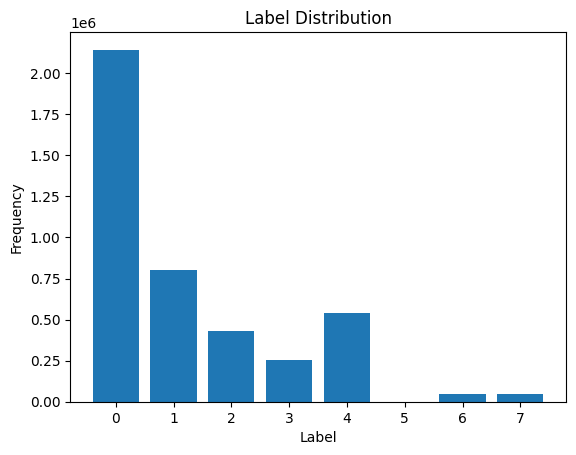

In [11]:

labels = data[b'label']
label_counts = Counter(labels)

# 打印分布
print("标签分布:", label_counts)

# 可视化
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()


In [17]:

# 读取原始 OpenSignals TXT 文件
def read_opensignals_file(file_path):
    with open(file_path, 'r') as f:
        header_lines = []
        line = f.readline()
        while "# EndOfHeader" not in line:
            header_lines.append(line)
            line = f.readline()
        # 读取数据部分
        df = pd.read_csv(f, sep='\t', header=None)
    return df, header_lines

txt_file = paths.WESAD_ROOT / "S2" / "S2_respiban.txt"
txt_df, header = read_opensignals_file(txt_file)
print(txt_df.head())


   0   1      2      3      4      5      6      7      8      9   10
0   0   0  31053  14694  32651  29553  37415  32324  31659  31364 NaN
1   1   0  30861  14680  32983  29556  37417  32333  31663  31379 NaN
2   2   0  30644  14684  32823  29561  37409  32340  31655  31367 NaN
3   3   0  30374  14701  32569  29553  37405  32341  31671  31076 NaN
4   4   0  30103  14684  32794  29561  37409  32342  31681  31365 NaN


加载文件: D:\Apps\Development\Projects\MultimodalSignal\WESAD\S2\S2.pkl
signal 键: dict_keys([b'chest', b'wrist'])
chest 键: dict_keys([b'ACC', b'ECG', b'EMG', b'EDA', b'Temp', b'Resp'])
ECG 数据形状: (4255300,)


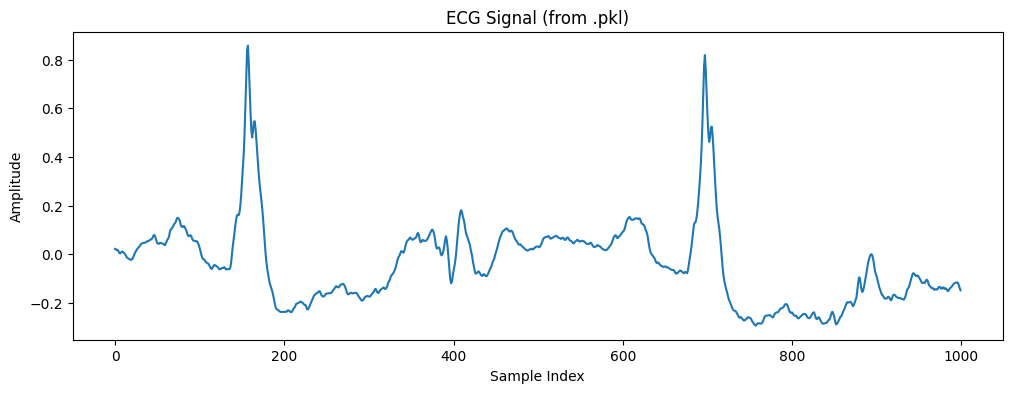

In [24]:
# 加载 pkl 数据
with open(file_path, 'rb') as f:
    pkl_data = pickle.load(f, encoding='bytes')

# 查看结构
print("signal 键:", pkl_data[b'signal'].keys())
print("chest 键:", pkl_data[b'signal'][b'chest'].keys())

# 查找 ECG 信号
if b'ECG' in pkl_data[b'signal'][b'chest']:
    ecg_pkl = pkl_data[b'signal'][b'chest'][b'ECG'].flatten()
    print("ECG 数据形状:", ecg_pkl.shape)

    # 可视化前 1000 个点
    plt.figure(figsize=(12, 4))
    plt.plot(ecg_pkl[:1000])
    plt.title("ECG Signal (from .pkl)")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.show()
else:
    print("未找到 b'ECG' 键，请检查键名或文件内容")


In [25]:
# 查看 .pkl 中 ECG 的最大最小值
print("PKL: Min = ", ecg_pkl.min(), "Max = ", ecg_pkl.max())

# 查看 .txt 中 CH1 的最大最小值
print("TXT: Min = ", raw_ecg.min(), "Max = ", raw_ecg.max())


PKL: Min =  -1.499542236328125 Max =  1.4993133544921875
TXT: Min =  10 Max =  65521


In [29]:
import pprint

pprint.pprint(pkl_data)


{b'label': array([0, 0, 0, ..., 0, 0, 0], shape=(4255300,), dtype=int32),
 b'signal': {b'chest': {b'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
       [ 0.92579997, -0.2216    , -0.55379999],
       [ 0.90820003, -0.21960002, -0.53920001],
       ...,
       [ 0.87179995, -0.12379998, -0.30419999],
       [ 0.87300003, -0.12339997, -0.30260003],
       [ 0.87020004, -0.12199998, -0.30220002]], shape=(4255300, 3)),
                        b'ECG': array([[ 0.02142334],
       [ 0.02032471],
       [ 0.01652527],
       ...,
       [-0.00544739],
       [ 0.00013733],
       [ 0.0040741 ]], shape=(4255300, 1)),
                        b'EDA': array([[5.25054932],
       [5.26733398],
       [5.24330139],
       ...,
       [0.36048889],
       [0.36582947],
       [0.365448  ]], shape=(4255300, 1)),
                        b'EMG': array([[-0.00444031],
       [ 0.00434875],
       [ 0.00517273],
       ...,
       [-0.01716614],
       [-0.02897644],
       [-0.02357483]], shape

In [36]:
# csv主观问卷
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置文件路径
csv_path = r'D:\Apps\Development\Projects\MultimodalSignal\WESAD\S2\S2_quest.csv'

# 读取 CSV 文件（使用分号作为分隔符）
with open(csv_path, 'r') as f:
    lines = f.readlines()

# 提取数据行（去掉空行和注释行）
data = []
for line in lines:

    data.append(line.strip().split(';'))

# 构建 DataFrame
df_raw = pd.DataFrame(data)

# 显示原始数据前几行
print("原始数据预览：")
print(df_raw)


原始数据预览：
         0      1      2       3      4       5      6      7  8  9   ... 17  \
0    # Subj     S2                                                    ...      
1   # ORDER   Base   TSST  Medi 1    Fun  Medi 2  sRead  fRead        ...      
2   # START   7.08  39.55   70.19  81.25   93.38  54.42  89.51        ...      
3     # END  26.32   50.3    77.1  87.47  100.15  56.07  91.15        ...      
4                                                                     ...      
5   # PANAS      1      1       3      2       1      3      1  1  1  ...  4   
6   # PANAS      3      2       4      1       3      3      1  2  1  ...  4   
7   # PANAS      1      1       2      3       1      2      1  1  1  ...  2   
8   # PANAS      1      1       2      3       1      1      1  1  1  ...  1   
9   # PANAS      1      1       1      2       1      1      1  1  1  ...  1   
10                                                                    ...      
11   # STAI      3      2       